# RED-TILING
This notebook will contains all the code to analyze the red tiling inputs and the results.

In [5]:
from script import *
import subprocess

data_folder = "resources/"
solver_folder = "solvers/"

# Select database here
data_file = "input_pdf.db"
# Select solver here
solver_file = "basicSolver.lp"

data = f"{data_folder}{data_file}"
solver = f"{solver_folder}{solver_file}"

# 1. Input

We will start by loading the input puzzle and displaying it.

Instance input_pdf.db:
n = 6, m = 4


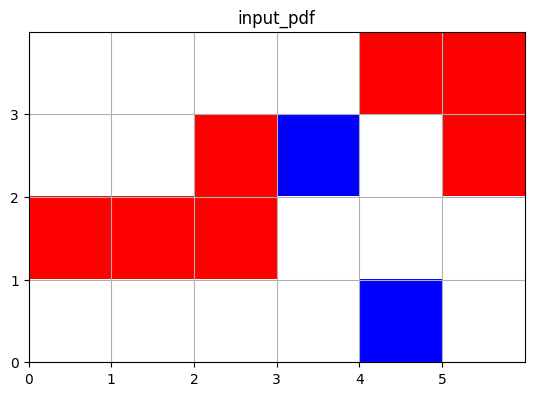

In [6]:
# print the database instance
print(f"Instance {data_file}:")
board, pieces = read_db_file(data)
display_board(board, data_file)

Then, we will display the available pieces.

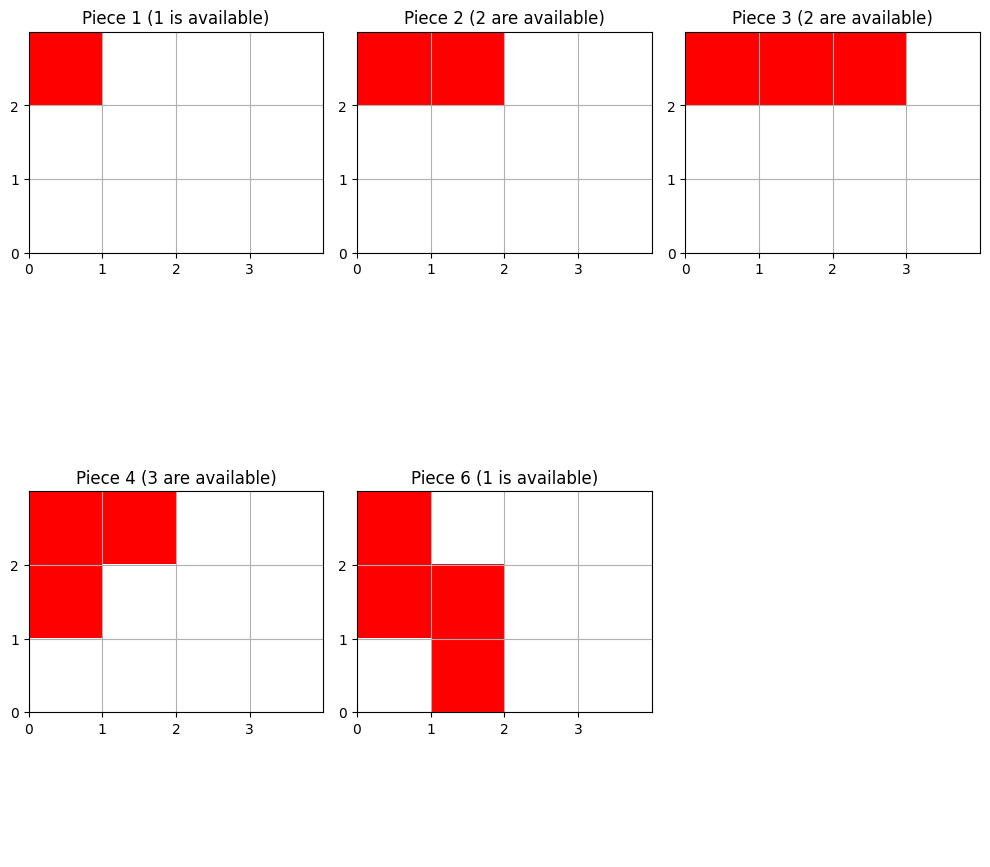

In [7]:
display_pieces(pieces)

# Solution
Here, we will call clingo and find the solution to the puzzle.

- If there is a solution, we will display it. (If there are multiple solutions, we will display the first one and mention the number of solutions)
- If there is no solution, we will display a message saying unsat.

Solving...
Solution found:


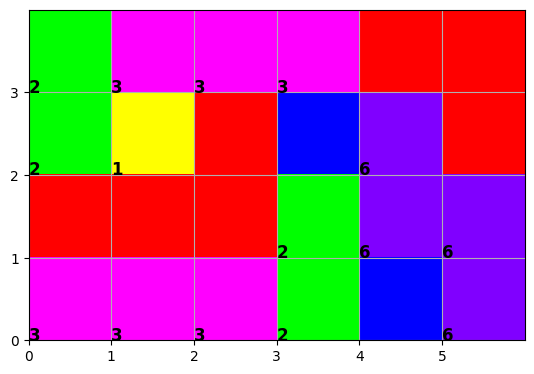

In [13]:
command = f"clingo {solver} {data} --verbose=0"

print("Solving...")
output = subprocess.run(command.split(), capture_output=True, text=True)

output = output.stdout    

if "UNSATISFIABLE" in output:
    print("No solution found.")
else:
    # Print the solution
    print("Solution found:")
    solutions = output.split("\n")[0].split(" ")

    new_board = add_solutions_to_board(board, solutions)

    display_board(new_board, "")
